# Kernels in SVM



So for handling nonlinear data we use support vector machine. When we add “Kernels” concept in “SVC” support vector classifier or say in soft margin SVM, it started working with “Non-Linear Dataset” too. Kernel serves as a kind of data transformation, allowing SVMs to better understand and work with the complex patterns found in non-linear data, making them a go-to solution for various machine learning challenges.

## What is a Kernel?

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*DmQEIIz29UulOmmxDx5DrQ.jpeg">

It's important to understand how kernels create decision boundaries for non-linear datasets. A kernel, at its core, is a mathematical function with a profound role in creating decision boundaries for non-linear datasets.

1. Kernels are mathematical function that works by taking input data and converting them into “Higher Dimensional”.

- For example, if we have 1D data and we apply kernel it will convert this data into 2D. And similarly, If we have a 2D dataset it will convert into 3D.
2. Kernels are designed in such a way that when we apply kernel and data point convert into higher dimensional automatically they become “Linearly Separable”

3. After the data is linearly separable we apply SVC (Support Vector Classifier) and in higher dimension, SVC separate the data.

4. Then we convert data into “Lower Dimension” again along with “Decision Boundary”

5. Through this process, we do “Non- Linear Classification”

## Visualization
How Kernel converts 2D dataset into 3D when applying the “Kernel RBF” technique which allows to divide nonlinear data. Firstly will see how it divides data when applying Linear Kernel which only works well upon Linear data.

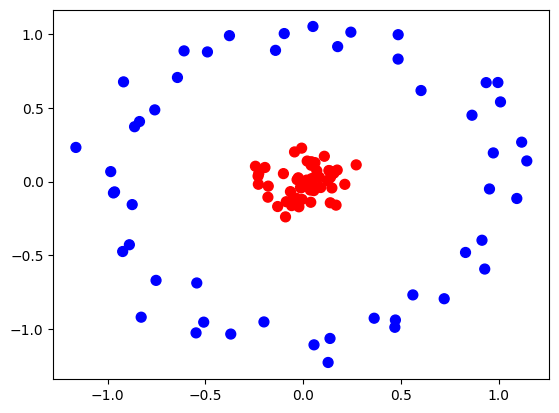

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap


import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=0.1, noise=0.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()

## Applying Linear SVC “Support Vector Classifier / Soft Margin SVM”

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Applying Linear SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# as can see Accuarcy is very low because we apply linear kernel on nonlinear data

Output: 0.5

/tmp/ipython-input-2054020078.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


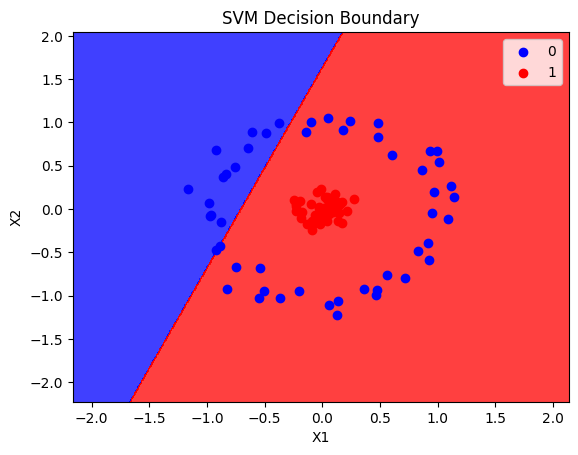

In [24]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()


plot_decision_boundary(X, y, classifier)
# here apply decision boundary and this way linear kernel cut the data. as data is nonlinear so accuracy will be bad by applyiong linear kernel

As we can see, there is no clear decision boundary made for this data because it is not linearly separable

## Visualing our data from two dimensions to three dimensions

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

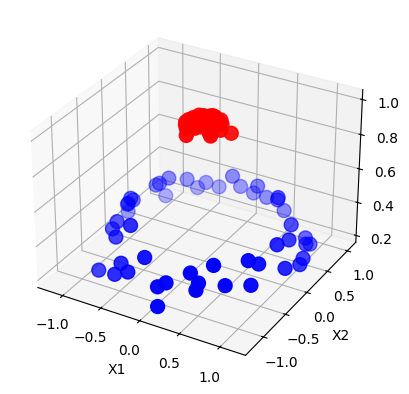

In [25]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

    # by applying this function we seperate the data


plot_3d_plot(X,y)
# In 3d still data is seperable by plane.

## Applying RBF Kernel

In [26]:
# So now we change the Kernel from linear to RBF which works well upon Nonlinear data
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

accuracy_score(y_test, y_pred)
# After applying RBF now we can get 100 percent accuracy

output:1.0

/tmp/ipython-input-2054020078.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


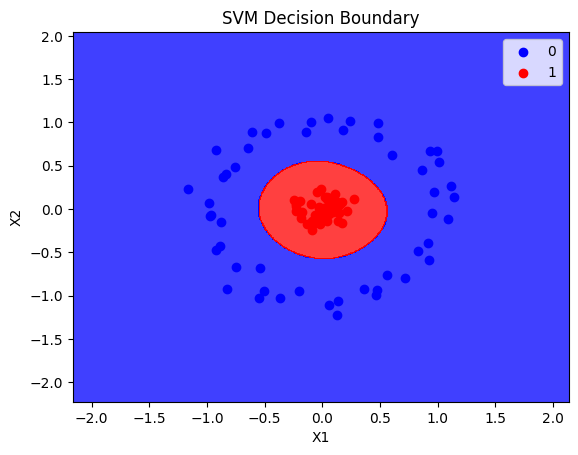

In [27]:
plot_decision_boundary(X, y, rbf_classifier)
# now after dividing data in 3d again projecting down this in 2d by decision boundary

## Applying “Polynomial Kernel” to see whether get the same result or not

1.0


/tmp/ipython-input-2054020078.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


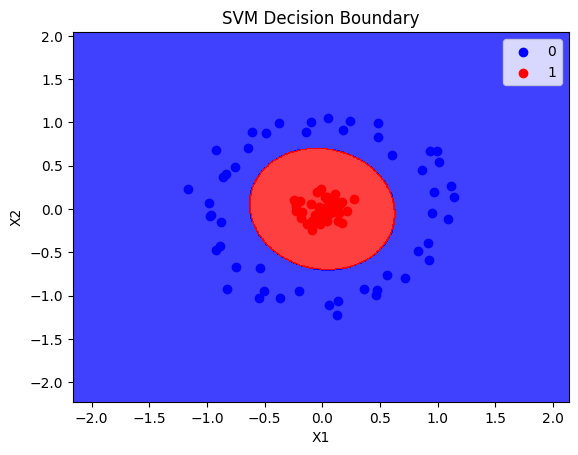

In [28]:
# same thin we can do by applying "Polynomial Kernel" with any degree which give best result. here taken Degree of 2
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

plot_decision_boundary(X, y, poly_classifier)

## Types of Kernels:

1. Linear Kernel
2. RBF (Radial Basis Kernel)
3. Polynomial Kernel
4. Sigmoid Kernel


When we have Non-Linear data then during the process when we call SVC in the “Kernel” parameter we can set the value. Generally, the best result is given by “RBF Kernel”. But at the same time, we can go with “Polynomial” and “Sigmoid” too. Basically, we need to do “Hyperparameter Tuning”

## Why is it called Trick?
It’s called the “Kernel Trick” for a reason:
We start with 2D or 3D data and use a Kernel to work with it. The trick here is that we don’t actually move the data into a higher dimension.
Instead, we perform all the work in the original dimension (2D or 3D), thanks to some nifty math concepts. We achieved the same results as if we had transformed the data but without the extra step.
This “trick” is super useful because it saves time and memory. It makes the process faster and more efficient. That’s why we call it a “trick” — it’s like a math shortcut that works like magic!